# Session 1 - Your "first" DataScience problem

In [13]:
# some imports

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

# Settings for the visualizations
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# create output folder
if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

In [14]:
## load data
train_set = pd.read_csv('dataset/housing-snapshot/train_set.csv',index_col=0) 
test_set = pd.read_csv('dataset/housing-snapshot/test_set.csv',index_col=0) 
#train_set.dropna(inplace= True) #Eliminamos la filas con algun valor NaN

## The problem
The machine learning is to predict the house price, but before that it is imporntat to study the dataset and its features

In [15]:
# print the dataset size
print("There is", train_set.shape[0], "samples")
print("Each sample has", train_set.shape[1], "features")

print("There is", test_set.shape[0], "samples")
print("Each sample has", test_set.shape[1], "features")

There is 5432 samples
Each sample has 21 features
There is 8148 samples
Each sample has 20 features


In [16]:
# print the top elements from the dataset
train_set



,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,NaN,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


In [55]:
# we can see the type of each features as follows
train_set.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [56]:
# print those categorical features
train_set.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [35]:
# We can check how many different type there is in the dataset using the folliwing line
train_set["Type"].value_counts()

h    3765
u    1191
t     476
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

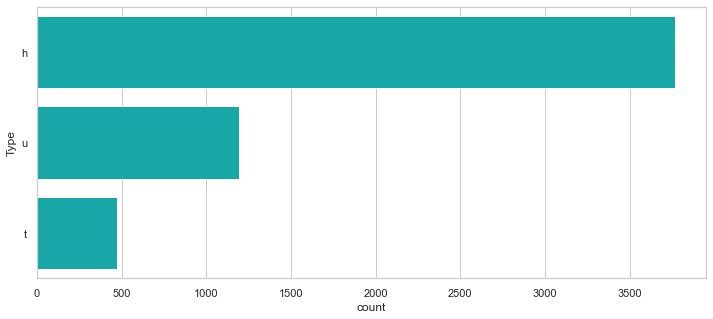

In [36]:
sns.countplot(y="Type", data=train_set, color="c")

It would be interesting to visualize all features (numerical and catergorical) in order to undertand them.

Check out this blog for plotting distribution: https://seaborn.pydata.org/tutorial/distributions.html
+ Seaborn version of this blog can be different from the one intalled in your machine (version 0.11 has been just realeased)

Check out this blog for plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

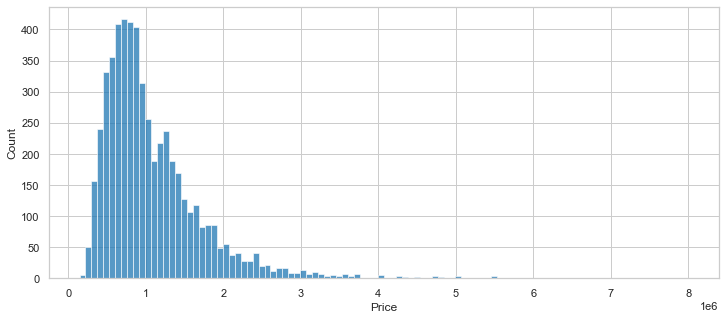

In [37]:
sns.histplot(train_set["Price"])
plt.show()


## BASELINE MODEL
### https://www.kaggle.com/c/mlub2021-session1/notebooks

This is a simple model that uses the K-nearest Neighbors Regressor

This model only uses 4 feaures: 'Rooms','Landsize', 'BuildingArea', 'YearBuilt'

----- EVALUATION ON TRAIN SET ------
RMSE 312092.1543652707
R^2:  0.7705429176627296


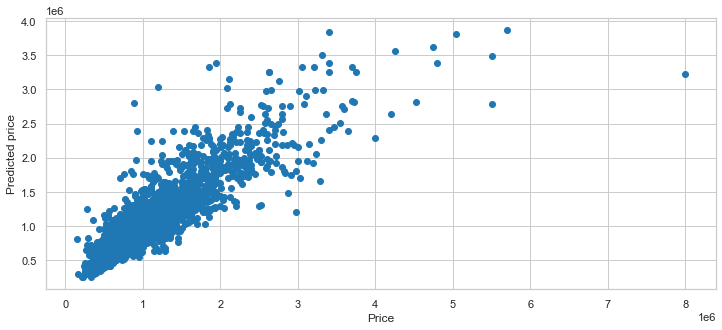

97401512816.35594

In [161]:
## the features

features = ['Rooms','Landsize', 'BuildingArea', 'YearBuilt','Bathroom','Postcode']
## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

mse(model.predict(X), y)


## EXERCICE - TRAIN A MODEL and upload your best solution to the Kaggle Challenge

Tasks: 
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor
    + You can chanege the paramenter n_neighbors from the KNeighborsRegressor
    
LINEAR REGRESSOR:
>from sklearn.linear_model import LinearRegression

>model = LinearRegression()

KNeighborsRegressor
> from sklearn import neighbors

> n_neighbors = 3 # you can modify this paramenter (ONLY THIS ONE!!!)

> model = neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)


In [ ]:
"""
+ Choose the best features for the problem. Some features are numercial but others categorical, think how to codify all of them.

    Para alimentar el modelo de aprendizaje automático, seleccioné las siguientes características: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude', 'Longtitude', 'h', 'u', 'Southern Metropolitan',
    'Western Metropolitan', 'PriceBySellerG', 'PriceByPostcode', 'PriceByYearBuilt', 'PriceByLandsize', 'PriceByPropertycount', 'Boroondara']. Estas características fueron escogidas debido a su buen resultado en.

    Es importante destacar que utilicé tanto datos sin procesar,(raw data),como datos procesados con técnicas de Feature engineering y codificación one-hot. La Feature engineering es el proceso de transformar
    datos sin procesar en características útiles para modelos de aprendizaje automático. Entre las características con las que utilicé este proceso se encuentran 'PriceBySellerG', 'PriceByPostcode',
    'PriceByYearBuilt', 'PriceByLandsize' y 'PriceByPropertycount'. En estos casos, agrupé las casas por cada una de estas características y calculé la media de los precios de todos los subgrupos resultantes. En
    algunos casos, redondeé los valores para evitar tener demasiados decimales.

    Para la codificación one-hot, utilicé las características 'Type', 'Method', 'Regionname' y 'CouncilArea'. Estas características tenían un número limitado de valores únicos, lo que las hizo adecuadas para la
    codificación one-hot. Luego, para determinar con cuáles de las columnas generadas debía quedarme, realicé un mapa de calor con las correlaciónes de la matriz de datos. Finalmente, seleccioné las columnas que
    tenían una correlación con el precio mayor a 0.2.
    
+ Choose the model. You have two choice: LinearRegression and KNeighborsRegressor

    Para esta práctica, teníamos la opción de elegir entre dos modelos: regresión lineal y K-Nearest Neighbors (K-vecinos más cercanos). La regresión lineal, aunque es un tipo de aprendizaje automático bastante
    simple, es efectiva cuando se trata de datos que siguen una tendencia lineal. En este caso, no estaba seguro de si los datos seguían esa tendencia, por lo que decidí no utilizar este método. Además, la regresión
    lineal puede volverse menos efectiva a medida que se agregan más características o pesos, lo cual sería el caso si aplicara la codificación one-hot. Agregar características innecesarias podría empeorar el
    rendimiento del modelo. Por otro lado, el modelo de K-Nearest Neighbors (K-vecinos más cercanos) no asume una relación lineal entre las características y la variable objetivo, lo que lo hace más versátil
    en casos en los que no está claro si existe una tendencia lineal en los datos. Por estas razones, finalmente opté por utilizar el modelo de K-Neighbors.
"""

Explain the choosed model and why you think that is is the best

In [17]:
"""

Aquí gestionamos las columnas que contienen valores NaN. En primer lugar, asignamos un valor aleatorio dentro del rango de 1930-2013, ya que estos años parecen ser los períodos en los que se construyeron
la mayoría de las casas. A continuación, asignamos el valor promedio de los automóviles que pueden tener las casas según el suburbio en el que se encuentran. Por último, asignamos el área de construcción
promedio de las casas en el suburbio en el que están ubicadas.

Es importante señalar que no hice ningún cambio en los valores NaN de la columna CouncilArea. Cuando intenté abordar este problema anteriormente, noté que las predicciones del modelo parecían empeorar.
Es posible que esto se debiera a que no encontré una estrategia adecuada para lidiar con estos valores faltantes. Dado que no pude encontrar una solución efectiva en ese momento, decidí mantener la
columna sin modificar en mi conjunto de datos.

"""


#Asignamos un valor random entre 1930-2012 para los valores Nan.

nan_indices = train_set[train_set['YearBuilt'].isna()].index
random_years = np.random.randint(1930, 2013, size=len(nan_indices))
train_set.loc[nan_indices, 'YearBuilt'] = random_years

nan_indices = test_set[test_set['YearBuilt'].isna()].index
random_years = np.random.randint(1930, 2013, size=len(nan_indices))
test_set.loc[nan_indices, 'YearBuilt'] = random_years

#Asignamos el valor medio de cars segun el post code en el que esta la casa con valores Nan para Car
mean_car_by_postcode = train_set.groupby('Suburb')['Car'].mean().reset_index()
mean_car_by_postcode['Car'] = mean_car_by_postcode['Car'].apply(np.ceil)
train_set['Car'] = train_set['Car'].fillna(train_set['Suburb'].map(mean_car_by_postcode.set_index('Suburb')['Car']))

mean_car_by_postcode = test_set.groupby('Suburb')['Car'].mean().reset_index()
mean_car_by_postcode['Car'] = mean_car_by_postcode['Car'].apply(np.ceil)
test_set['Car'] = test_set['Car'].fillna(test_set['Suburb'].map(mean_car_by_postcode.set_index('Suburb')['Car']))


#Asignamos el valor medio de BuildingArea segun el post code en el que esta la casa con valores Nan para BuildingArea
mean_BA_by_postcode = train_set.groupby('Suburb')['BuildingArea'].mean().reset_index()
mean_BA_by_postcode['BuildingArea'] = mean_BA_by_postcode['BuildingArea'].round(2)
train_set['BuildingArea'] = train_set['BuildingArea'].fillna(train_set['Suburb'].map(mean_BA_by_postcode.set_index('Suburb')['BuildingArea']))

mean_BA_by_postcode = test_set.groupby('Suburb')['BuildingArea'].mean().reset_index()
mean_BA_by_postcode['BuildingArea'] = mean_BA_by_postcode['BuildingArea'].round(2)
test_set['BuildingArea'] = test_set['BuildingArea'].fillna(test_set['Suburb'].map(mean_BA_by_postcode.set_index('Suburb')['BuildingArea']))



compute = True

In [18]:
features_to_transform = ['SellerG','Postcode', 'YearBuilt','Landsize','Propertycount']

if compute:
    for feature in features_to_transform:
        #Redondeamos a las decimas
        new_name = 'PriceBy'
        new_name += feature
        if new_name not in train_set.columns:
            if feature in ['Landsize', 'Propertycount']:
                train_set[feature] = train_set[feature].apply(lambda x: np.round(x, decimals=-1))
                test_set[feature] = test_set[feature].apply(lambda x: np.round(x, decimals=-1))       

            meanPrice_by_feature = train_set.groupby(feature)['Price'].mean().reset_index()
            mean_price = train_set['Price'].mean()

            features_test = test_set[feature].unique()
            df_features_test = pd.DataFrame({feature: features_test})

            meanPrice_by_feature = df_features_test.merge(meanPrice_by_feature, on=feature,how='left')
            meanPrice_by_feature['Price'].fillna(mean_price, inplace=True)

            train_set = train_set.merge(meanPrice_by_feature, on=feature, how='left')
            train_set = train_set.rename(columns={'Price_y': new_name, 'Price_x' : 'Price'})
            test_set = test_set.merge(meanPrice_by_feature, on=feature, how='left')
            test_set = test_set.rename(columns={'Price': new_name})
            
    #codificación one-hot encoding
    features_binari = ['Type', 'Method','Regionname','CouncilArea']
    
    for binari in features_binari:
        if binari in train_set.columns:
            train_set = train_set.join(pd.get_dummies(train_set[binari]), how='left').drop([binari], axis=1)
            test_set = test_set.join(pd.get_dummies(test_set[binari]), how='left').drop([binari], axis=1)
            extra_columns = set(train_set.columns) - set(test_set.columns)

    print(extra_columns)      
    for column in extra_columns:
            if column != 'Price':
                test_set[column] = 0


columns_to_exclude = ['Suburb', 'Address' ,'Date','Price','SellerG']
df_aux = train_set.drop(columns=columns_to_exclude)

#Normalizamos todas las columnas menos Price. 
array_np = df_aux.columns.to_numpy()
features_to_norm = array_np[:18]
for k in train_set.columns:
    if k in features_to_norm :
        train_set[k] = ((train_set[k] - train_set[k].min()) / (train_set[k].max() - train_set[k].min()) )* 2 -1
        test_set[k] = ((test_set[k] - test_set[k].min()) / (test_set[k].max() - test_set[k].min()))* 2 -1
       
compute = False  
# Extrae la columna 'Price' y la ponemos en la ultima posicion
price_column = train_set['Price']  
train_set = train_set.drop(columns=['Price'])  
train_set['Price'] = price_column
train_set = train_set.dropna()

{'Unavailable', 'Price'}


<AxesSubplot:>

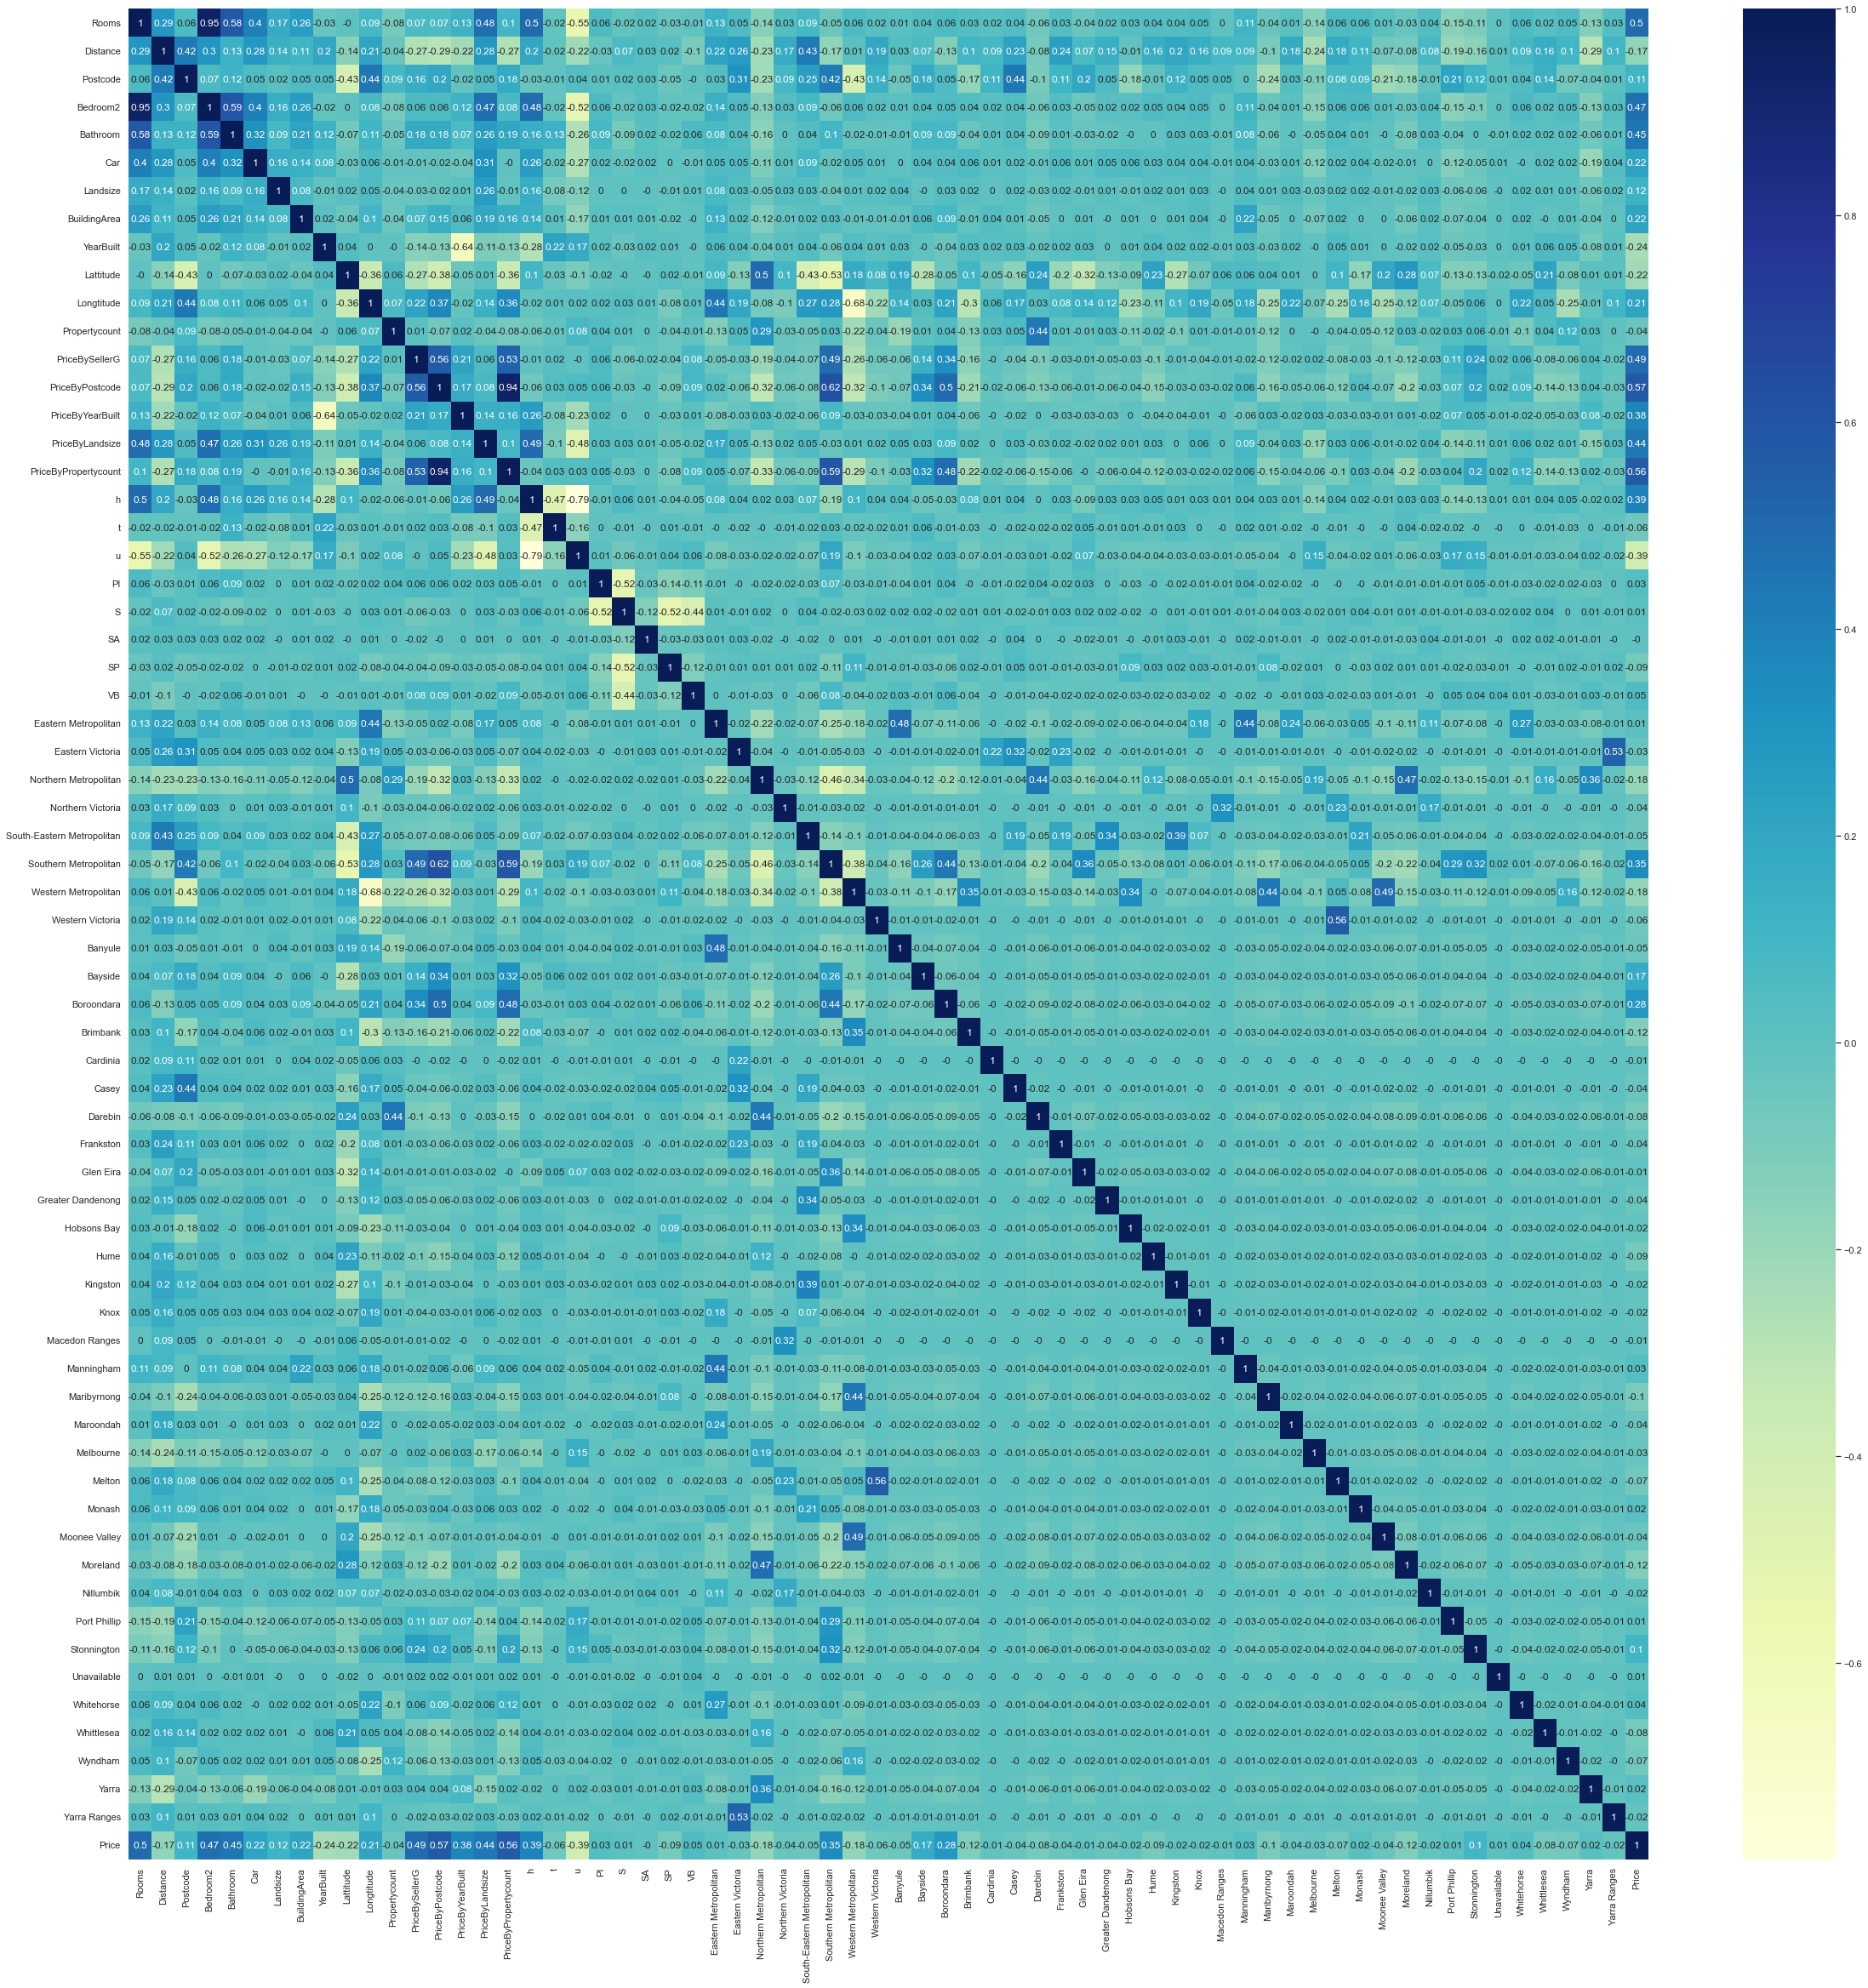

In [80]:
plt.figure(figsize=(40,40))
sns.heatmap(train_set.corr().round(2), annot = True, cmap="YlGnBu")

----- EVALUATION ON TRAIN SET ------
RMSE 235008.74281822678
R^2:  0.8651642315202516


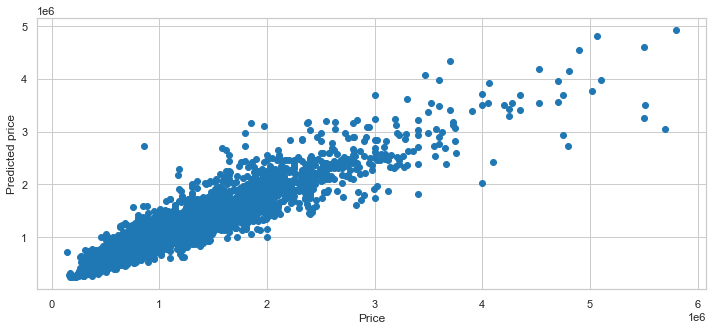

In [19]:
## the features
features =  ['Rooms','Distance', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude', 'Longtitude',
              'h', 'u', 'Southern Metropolitan','Western Metropolitan','PriceBySellerG','PriceByPostcode',
             'PriceByYearBuilt','PriceByLandsize','PriceByPropertycount', 'Boroondara']

## DEFINE YOUR FEATURES
X = train_set[features].fillna(0)
y = train_set[['Price']]

## the model
# KNeighborsRegressor
from sklearn import neighbors
n_neighbors = 4 # you can modify this paramenter (ONLY THIS ONE!!!)
model = neighbors.KNeighborsRegressor(n_neighbors)

## fit the model
model.fit(X, y)

## predict training set
y_pred = model.predict(X)

## Evaluate the model and plot it
from sklearn.metrics import mean_squared_error, r2_score
print("----- EVALUATION ON TRAIN SET ------")
print("RMSE",np.sqrt(mean_squared_error(y, y_pred)))
print("R^2: ",r2_score(y, y_pred))


plt.scatter(y, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

## predict the test set and generate the submission file
X_test = test_set[features].fillna(0)
y_pred = model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('output/session1/baseline.csv',index=False)

In [1]:
from sklearn.ensemble import RandomForestRegressor
# Modelo RandomForestRegressor
forest = RandomForestRegressor()

# Características correlacionadas
features =  ['Rooms','Distance', 'Bathroom', 'Car', 'Lattitude', 'Longtitude',
             'h', 'u','t', 'Southern Metropolitan','Western Metropolitan','PriceBySellerG',
             'PriceByPostcode','PriceByYearBuilt','Boroondara','BuildingArea','VB', 'SP', 'PI', 'S', 'SA']

# Entrenar el modelo
X = housing_num_tr[features]
y = housing_num_tr['Price']

forest.fit(X, y)


NameError: name 'housing_num_tr' is not defined